# Student Grade Prediction Project
# Sai Krishna Prashanth Kolluru

# Displaying the first few rows to understand the structure of the dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading the dataset
file_path = 'Assignment_2.xlsx'
df = pd.read_csv("C:\\Users\\91957\\AppData\\Roaming\\Python\\Python312\\Scripts\\Python Assignments\\Assignment_2.csv")

# Displaying the first few rows to understand the structure
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Checking for missing values and filling the values in the given dataset (if any) 

In [2]:
# Step 2: Data Preprocessing

# Step 2.1: Handling Missing Values
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Filling missing values (if any) (numerical with median, categorical with mode)
for column in df.columns:
    if column not in ['G1', 'G2', 'G3']:  # Exclude target variables
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())


Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Data Preprocessing - Encoding Categorical Variables and Normalizing data

In [3]:
# Step 2.0: Encoding Categorical Variables
# Identifying categorical columns, excluding the target variables
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in ['G1', 'G2', 'G3']]

# Applying Label Encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Step 2.1: Normalizing and Standardizing Data
# Creating a copy of the target variables
target_columns = df[['G1', 'G2', 'G3']].copy()

# Identifying numerical columns, excluding the target variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col not in ['G1', 'G2', 'G3']]

# Standardizing the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Adding the target variables back to the dataframe
df[['G1', 'G2', 'G3']] = target_columns

# Checking the preprocessed data
print("\nPreprocessed Data (First 10 rows):")
print(df.head(10))


Preprocessed Data (First 10 rows):
    school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.36305 -0.948176  1.023046  0.535392 -0.636941 -2.938392  1.143856   
1 -0.36305 -0.948176  0.238380  0.535392 -0.636941  0.340322 -1.600009   
2 -0.36305 -0.948176 -1.330954  0.535392  1.570004  0.340322 -1.600009   
3 -0.36305 -0.948176 -1.330954  0.535392 -0.636941  0.340322  1.143856   
4 -0.36305 -0.948176 -0.546287  0.535392 -0.636941  0.340322  0.229234   
5 -0.36305  1.054656 -0.546287  0.535392  1.570004  0.340322  1.143856   
6 -0.36305  1.054656 -0.546287  0.535392  1.570004  0.340322 -0.685387   
7 -0.36305 -0.948176  0.238380  0.535392 -0.636941 -2.938392  1.143856   
8 -0.36305  1.054656 -1.330954  0.535392  1.570004 -2.938392  0.229234   
9 -0.36305  1.054656 -1.330954  0.535392 -0.636941  0.340322  0.229234   

       Fedu      Mjob      Fjob  ...    famrel  freetime     goout      Dalc  \
0  1.360371 -1.769793  1.993149  ...  0.062194 -0.236010  0.801479 -0

# Exploratory Data Analysis 

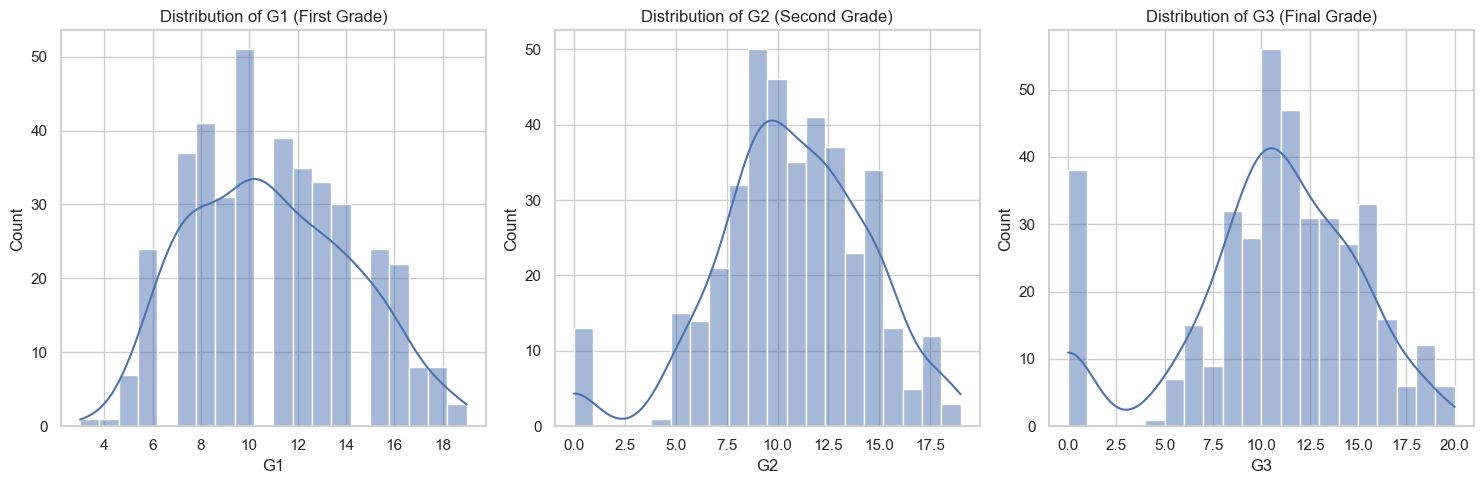

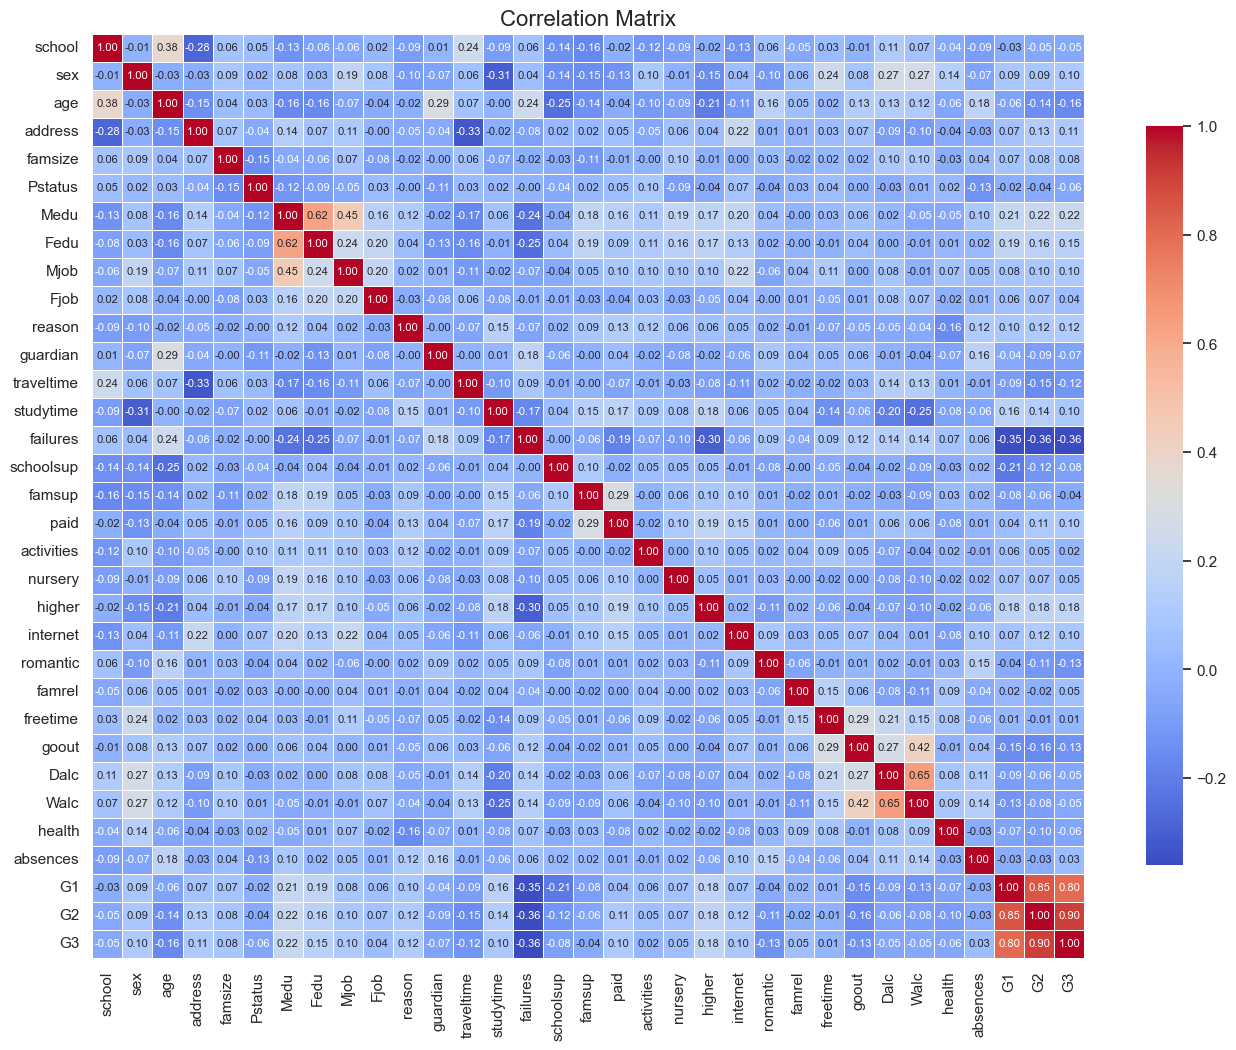

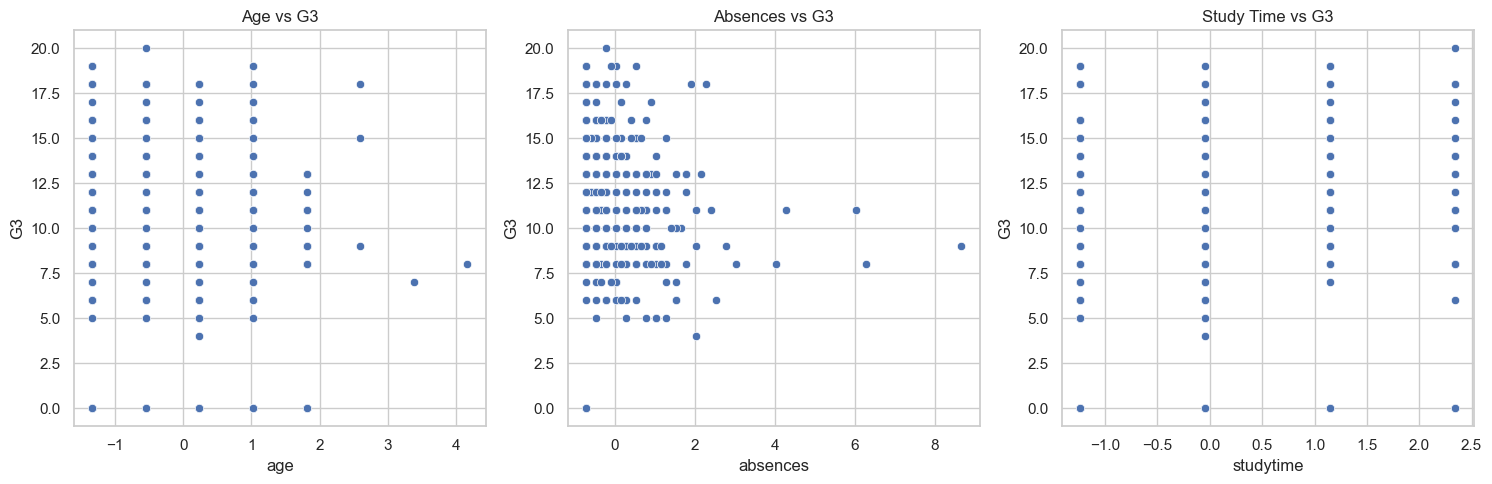

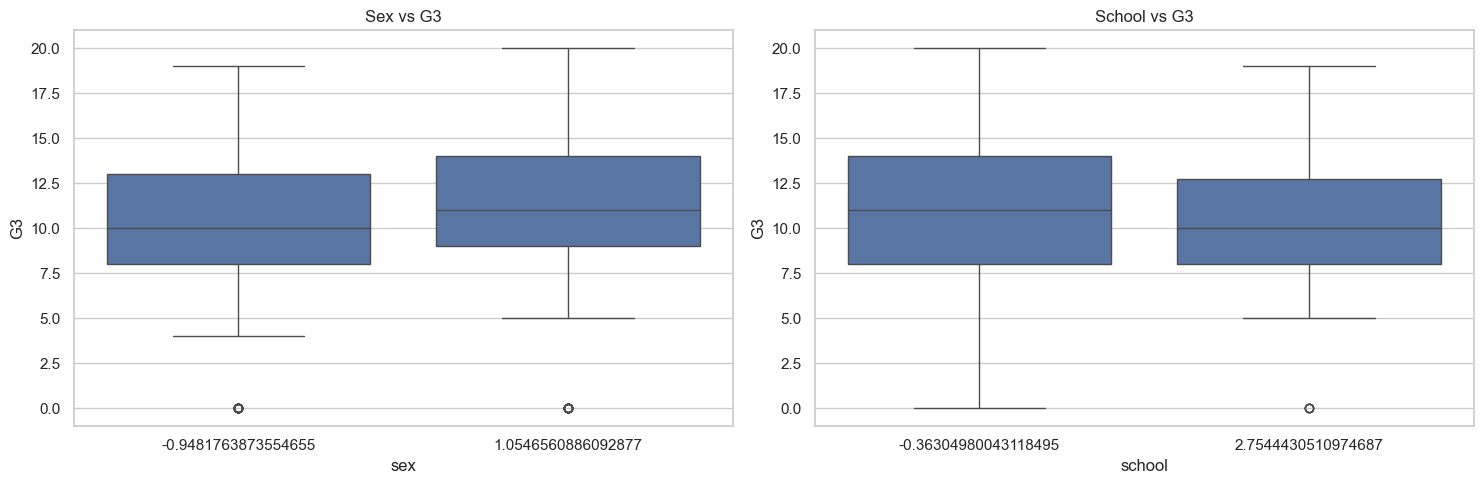

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style for seaborn
sns.set(style="whitegrid")

# 3.1: Visualizing the Distribution of Target Variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['G1'], kde=True, bins=20)
plt.title('Distribution of G1 (First Grade)')

plt.subplot(1, 3, 2)
sns.histplot(df['G2'], kde=True, bins=20)
plt.title('Distribution of G2 (Second Grade)')

plt.subplot(1, 3, 3)
sns.histplot(df['G3'], kde=True, bins=20)
plt.title('Distribution of G3 (Final Grade)')

plt.tight_layout()
plt.show()

# 3.2: Correlation Matrix Visualization
plt.figure(figsize=(16, 12))  # Increasing the figure size for better readability
correlation_matrix = df.corr()

# Generating a heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            annot_kws={"size": 8},  # Adjusting the font size for the annotations
            linewidths=0.5,  # Adding gridlines for clarity
            cbar_kws={"shrink": 0.8})  # Shrinking the color bar for a better fit

plt.title('Correlation Matrix', fontsize=16)
plt.show()

# 3.3: Scatter Plots to Visualize Relationships Between Key Features and G3
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='G3', data=df)
plt.title('Age vs G3')

plt.subplot(1, 3, 2)
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Absences vs G3')

plt.subplot(1, 3, 3)
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs G3')

plt.tight_layout()
plt.show()

# 3.4: Box Plots to Visualize Categorical Variables vs G3
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Sex vs G3')

plt.subplot(1, 2, 2)
sns.boxplot(x='school', y='G3', data=df)
plt.title('School vs G3')

plt.tight_layout()
plt.show()

# Performing Chi Square tests to identify important features


Chi-Square Test Results for G1:
       Feature  Chi-Square       P-value
14    failures  131.735043  2.953372e-20
29    absences   80.703441  1.242425e-10
15   schoolsup   35.432187  3.466840e-03
26        Dalc   31.179326  1.276396e-02
10      reason   26.872252  4.292506e-02
27        Walc   23.769061  9.467120e-02
13   studytime   23.385842  1.038029e-01
25       goout   19.657957  2.360227e-01
28      health   14.169792  5.860663e-01
17        paid   13.802533  6.134219e-01
2          age   13.746882  6.175642e-01
7         Fedu   13.416273  6.421124e-01
12  traveltime   13.415043  6.422034e-01
6         Medu   12.402808  7.158171e-01
22    romantic   10.849556  8.186748e-01
4      famsize   10.672723  8.292218e-01
18  activities   10.341921  8.481729e-01
0       school    9.827213  8.754944e-01
1          sex    8.048267  9.474165e-01
8         Mjob    7.574198  9.605442e-01
16      famsup    6.502738  9.816987e-01
11    guardian    4.748163  9.968701e-01
9         Fjob    3.8129

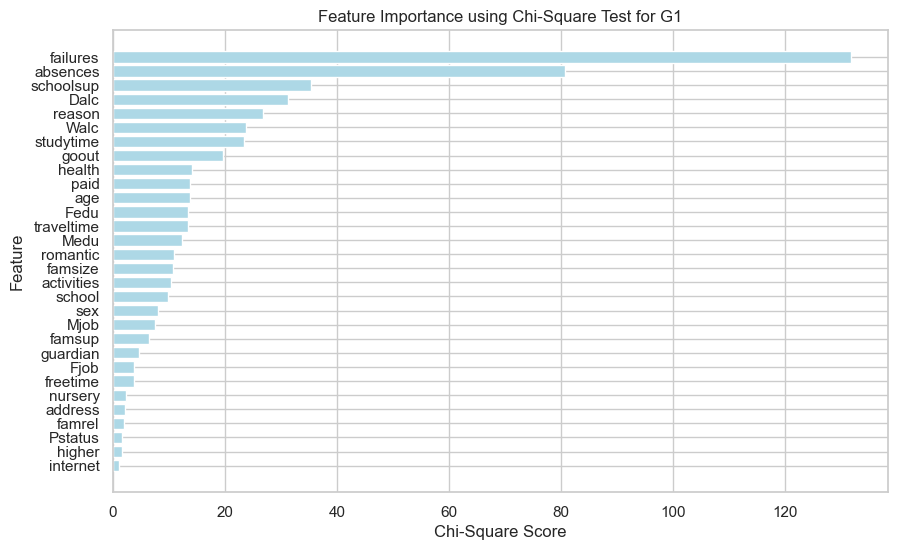


Chi-Square Test Results for G2:
       Feature  Chi-Square       P-value
29    absences  224.041557  1.048110e-38
14    failures  117.433679  1.708248e-17
26        Dalc   42.626242  3.180408e-04
10      reason   36.181072  2.730526e-03
2          age   30.941415  1.368990e-02
27        Walc   29.518224  2.066700e-02
15   schoolsup   28.847409  2.498556e-02
12  traveltime   19.395400  2.486931e-01
17        paid   17.080698  3.803938e-01
28      health   15.644435  4.780399e-01
0       school   15.359515  4.984814e-01
25       goout   14.976921  5.263295e-01
7         Fedu   13.808382  6.129865e-01
6         Medu   13.233672  6.556018e-01
22    romantic   12.552476  7.051540e-01
4      famsize   11.418529  7.829450e-01
8         Mjob   10.681796  8.286874e-01
13   studytime   10.426475  8.434286e-01
18  activities    7.112251  9.710363e-01
11    guardian    6.842769  9.761739e-01
24    freetime    6.722536  9.782457e-01
1          sex    6.478653  9.820516e-01
23      famrel    4.9173

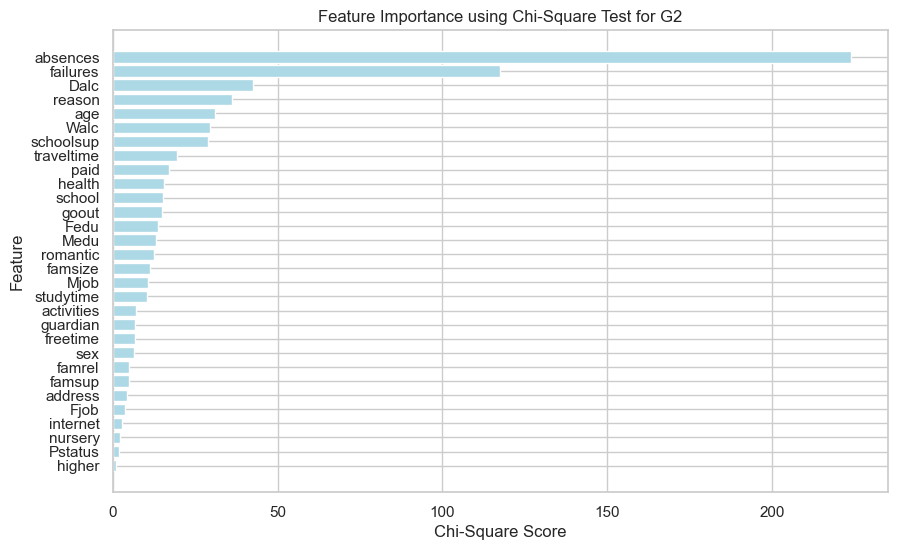


Chi-Square Test Results for G3:
       Feature  Chi-Square        P-value
29    absences  555.589572  3.530500e-107
14    failures  140.934898   1.436068e-21
26        Dalc   52.597253   1.654714e-05
27        Walc   50.474452   3.564021e-05
10      reason   29.724125   2.840462e-02
15   schoolsup   28.319018   4.134587e-02
2          age   22.420656   1.690780e-01
12  traveltime   21.839901   1.909547e-01
22    romantic   20.089526   2.696758e-01
17        paid   16.129900   5.146455e-01
25       goout   15.438443   5.639328e-01
8         Mjob   14.807099   6.093739e-01
28      health   14.160596   6.557031e-01
6         Medu   13.894852   6.745305e-01
4      famsize   12.429690   7.734489e-01
13   studytime   12.249900   7.847742e-01
1          sex   10.581662   8.774669e-01
7         Fedu   10.375563   8.871271e-01
0       school   10.310678   8.900790e-01
18  activities    7.601049   9.743503e-01
24    freetime    6.483302   9.893048e-01
3      address    5.876113   9.939801e-01
1

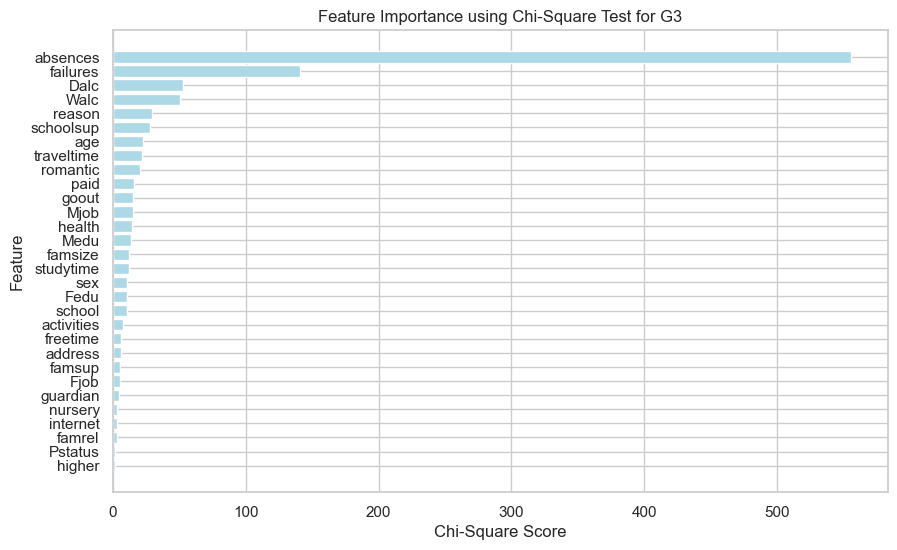

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# Encoding all features using LabelEncoder to ensure they are treated as categorical
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Listing all input features (excluding target variables)
input_features = [col for col in df.columns if col not in ['G1', 'G2', 'G3']]

# Function to perform Chi-Square test for all input features
def chi_square_test(df, input_features, target_variable):
    print(f"\nChi-Square Test Results for {target_variable}:")
    X = df[input_features]  # All input features
    y = df[target_variable]  # Target variable
    chi_scores, p_values = chi2(X, y)  # Perform Chi-Square test
    results = pd.DataFrame({'Feature': X.columns, 'Chi-Square': chi_scores, 'P-value': p_values})
    results = results.sort_values(by='Chi-Square', ascending=False)  # Sort by Chi-Square score
    
    # Displaing results
    print(results)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.barh(results['Feature'], results['Chi-Square'], color='lightblue')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance using Chi-Square Test for {target_variable}')
    plt.gca().invert_yaxis()
    plt.show()

# Performing Chi-Square test for G1, G2, and G3
chi_square_test(df, input_features, 'G1')
chi_square_test(df, input_features, 'G2')
chi_square_test(df, input_features, 'G3')

# Checking for multicollinearity in the input factors and removing them if any found with multicollinearity

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding constant for VIF calculation
X = add_constant(df)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Variable        VIF
0        const  96.304234
1       school   1.462166
2          sex   1.445449
3          age   1.686558
4      address   1.317625
5      famsize   1.126562
6      Pstatus   1.123401
7         Medu   2.228725
8         Fedu   1.880424
9         Mjob   1.457519
10        Fjob   1.146352
11      reason   1.128268
12    guardian   1.226278
13  traveltime   1.261288
14   studytime   1.334320
15    failures   1.410159
16   schoolsup   1.214503
17      famsup   1.273252
18        paid   1.294873
19  activities   1.138630
20     nursery   1.117120
21      higher   1.254215
22    internet   1.218144
23    romantic   1.147781
24      famrel   1.143917
25    freetime   1.268831
26       goout   1.442404
27        Dalc   1.897575
28        Walc   2.277596
29      health   1.129759
30    absences   1.297040
31          G1   5.457830
32          G2  12.169632
33          G3   9.690063


# Visualizing input features to check for multicollinearity

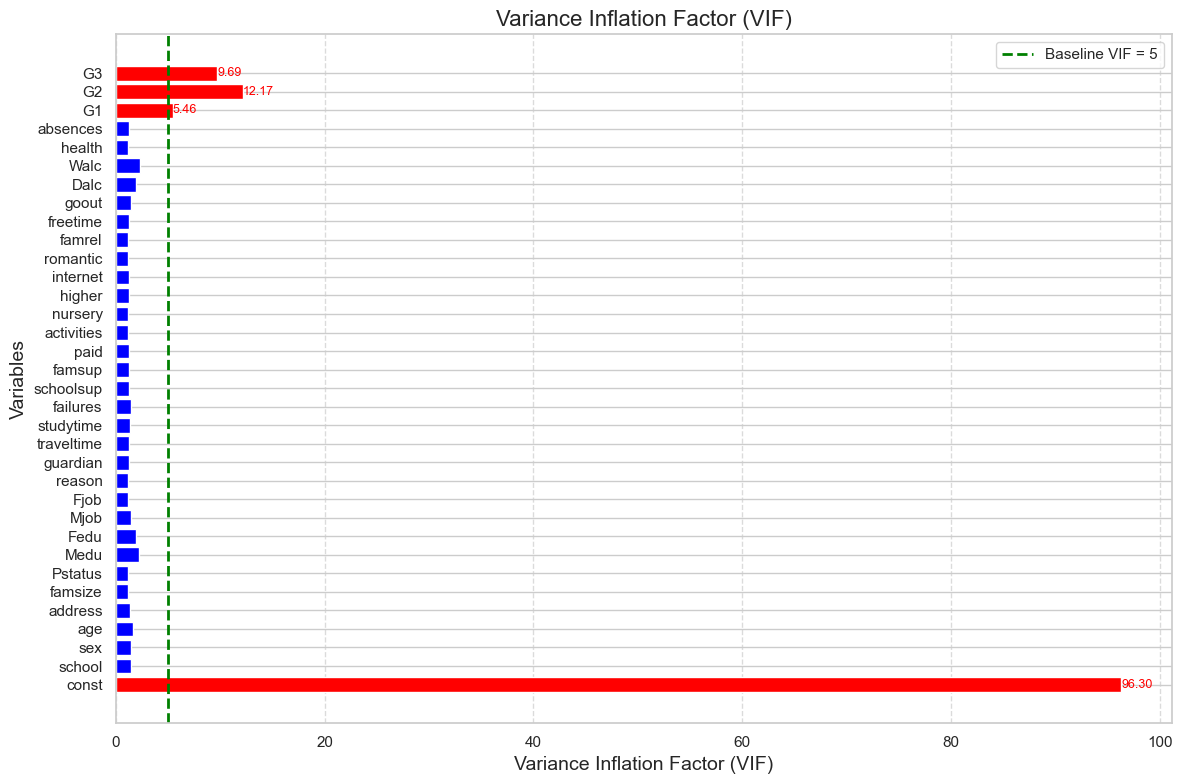

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Setting baseline VIF threshold as 5
baseline_vif = 5

# Creating the plot
plt.figure(figsize=(12, 8))
bars = plt.barh(vif['Variable'], vif['VIF'], color=['red' if x > baseline_vif else 'blue' for x in vif['VIF']])

# Adding a vertical line for the baseline VIF
plt.axvline(x=baseline_vif, color='green', linestyle='--', linewidth=2, label=f'Baseline VIF = {baseline_vif}')

# Adding labels for bars exceeding the baseline
for bar, vif_value in zip(bars, vif['VIF']):
    if vif_value > baseline_vif:
        plt.text(vif_value, bar.get_y() + bar.get_height()/2, f'{vif_value:.2f}', va='center', ha='left', fontsize=9, color='red')

# Setting labels and title
plt.xlabel('Variance Inflation Factor (VIF)', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.title('Variance Inflation Factor (VIF)', fontsize=16)
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying plot
plt.tight_layout()
plt.show()

# Treating target variable (g1) as a categorical variable and modelling a classification model

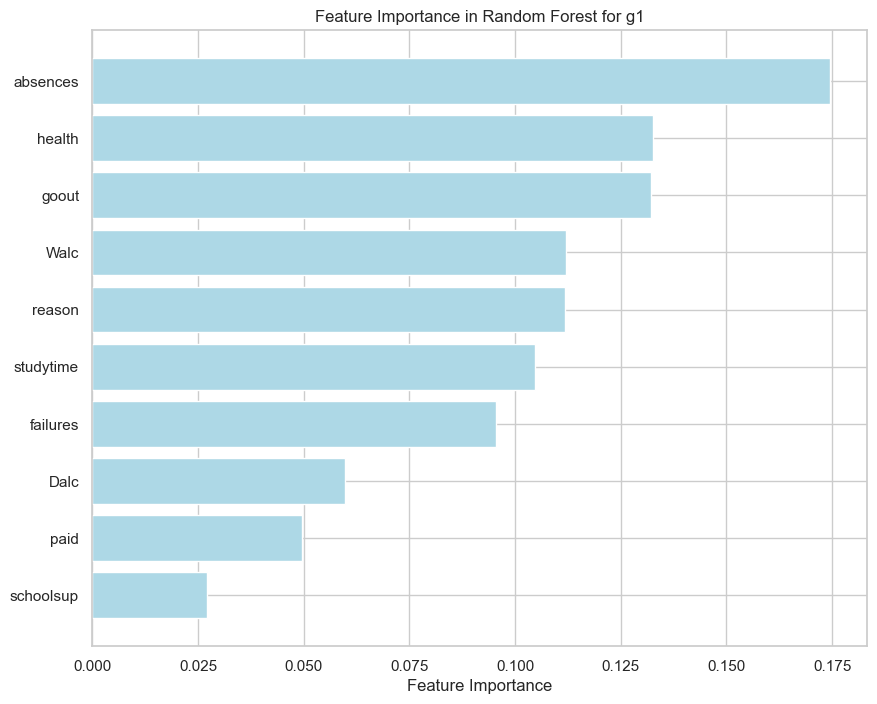

Model Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       0.83      1.00      0.91        15
           3       0.60      0.94      0.73        16
           4       0.44      0.44      0.44        16
           5       0.67      0.27      0.38        15
           6       0.57      0.50      0.53        16
           7       0.36      0.25      0.30        16
           8       0.41      0.47      0.44        15
           9       0.50      0.33      0.40        15
          10       0.67      0.62      0.65        16
          11       0.64      0.60      0.62        15
          12       0.65      0.94      0.77        16
          13       0.93      0.87      0.90        15
          14       0.88      1.00      0.94        15
          15       0.93      0.87      0.90        15
          16       0.88      1.00  

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Selecteing top 10 features based on Chi-Square analysis
top_features = ['absences', 'failures', 'schoolsup', 'Walc', 'reason',
                'Dalc', 'studytime', 'goout', 'health', 'paid']

# Preparing input features (X) and target variable (y)
X_top = df[top_features]
y = df['G1']

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in X_top.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_top[col] = le.fit_transform(X_top[col])
    label_encoders[col] = le

# Handling class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_top, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualizing feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh([top_features[i] for i in sorted_indices], feature_importances[sorted_indices], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest for g1')
plt.gca().invert_yaxis()
plt.show()

# Displaying evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Treating target varaible (g1) as a continuous variable and modelling a regression model

Mean Absolute Error (MAE): 1.31
Mean Squared Error (MSE): 4.86
R² Score: 0.80


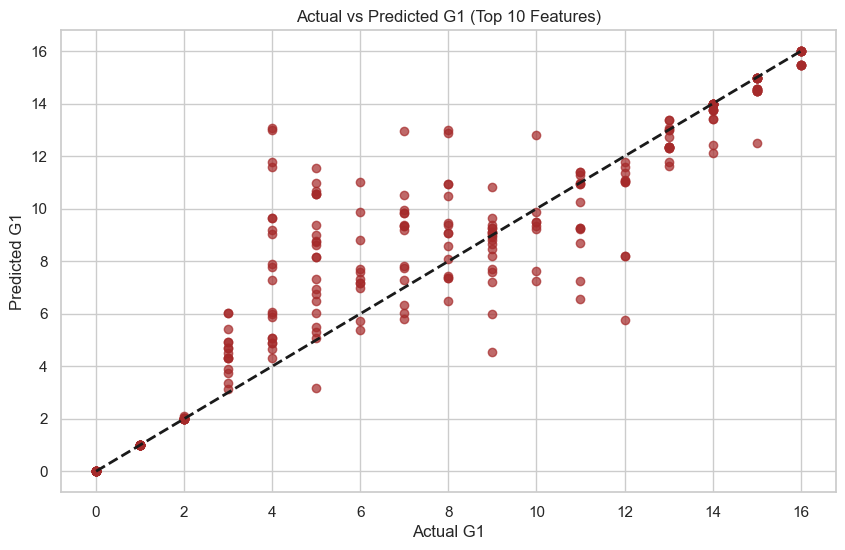

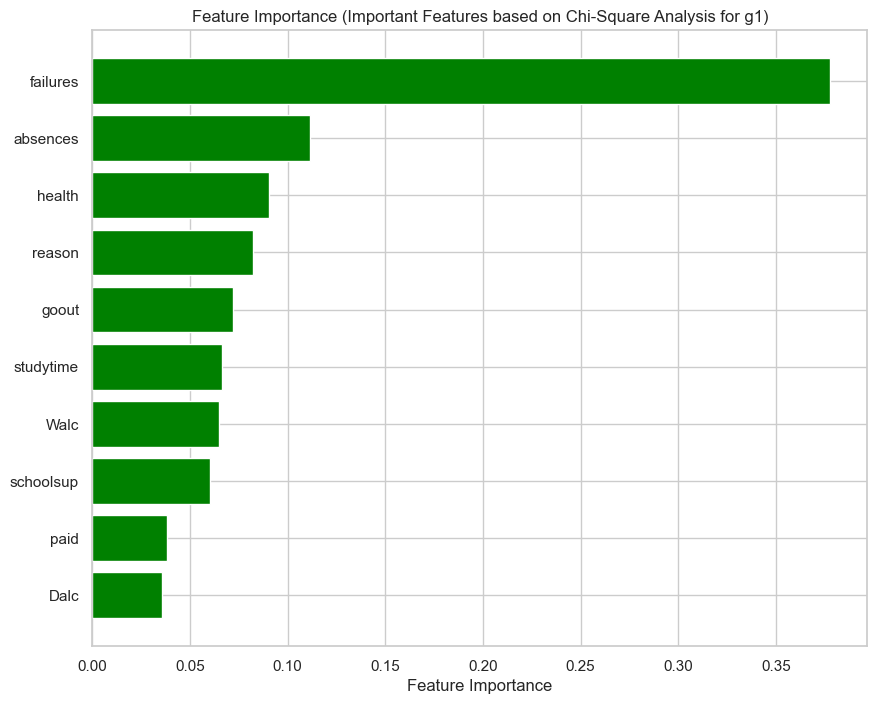

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt

# Extracting top 10 features based on feature importance
top_features = ['absences', 'failures', 'schoolsup', 'Walc', 'reason',
                'Dalc', 'studytime', 'goout', 'health', 'paid']

# Preparing input features (X) and target variable (y)
X_top = df[top_features]
y = df['G1']  # Continuous target variable

# Oversampling to handle imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_top, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Initializing and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual G1')
plt.ylabel('Predicted G1')
plt.title('Actual vs Predicted G1 (Top 10 Features)')
plt.show()

# Visualizing Feature Importances (Top 10)
feature_importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh([top_features[i] for i in sorted_indices], feature_importances[sorted_indices], color='green')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Important Features based on Chi-Square Analysis for g1)')
plt.gca().invert_yaxis()
plt.show()

# Treating target variable (g2) as a categorical variable and modelling a classification model

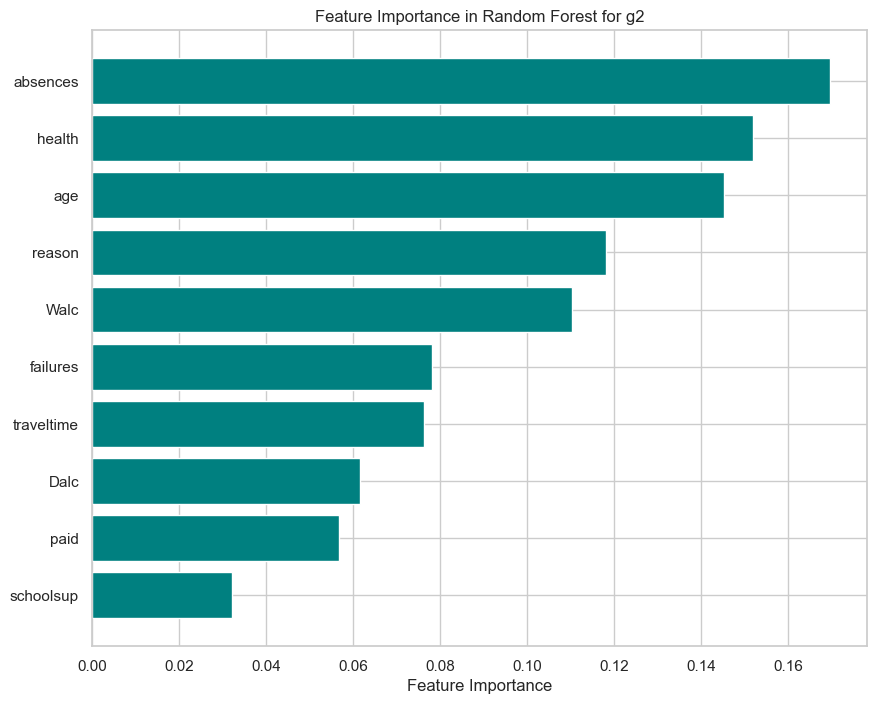

Model Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       1.00      1.00      1.00        15
           2       0.67      0.93      0.78        15
           3       0.71      1.00      0.83        15
           4       0.67      0.93      0.78        15
           5       0.56      0.33      0.42        15
           6       0.00      0.00      0.00        15
           7       0.50      0.20      0.29        15
           8       0.71      0.67      0.69        15
           9       0.45      0.33      0.38        15
          10       0.71      0.33      0.45        15
          11       0.79      1.00      0.88        15
          12       0.39      0.47      0.42        15
          13       0.65      1.00      0.79        15
          14       0.88      1.00      0.94        15
          15       0.92      0.80      0.86        15
          16       0.88      1.00  

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Selecteing top 10 features based on Chi-Square analysis
top_features = ['absences', 'failures', 'Dalc', 'Walc', 'reason',
                'age', 'schoolsup', 'traveltime', 'paid', 'health']

# Preparing input features (X) and target variable (y)
X_top = df[top_features]
y = df['G2']

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in X_top.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_top[col] = le.fit_transform(X_top[col])
    label_encoders[col] = le

# Handling class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_top, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualizing feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh([top_features[i] for i in sorted_indices], feature_importances[sorted_indices], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest for g2')
plt.gca().invert_yaxis()
plt.show()

# Displaying evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Treating target variable (g2) as a continuous variable and modelling a regression model

Mean Absolute Error (MAE): 1.45
Mean Squared Error (MSE): 5.37
R² Score: 0.78


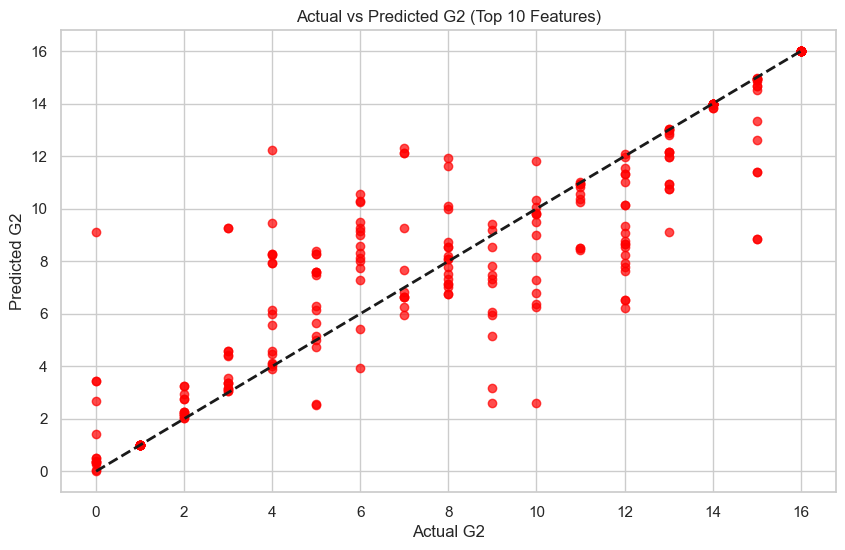

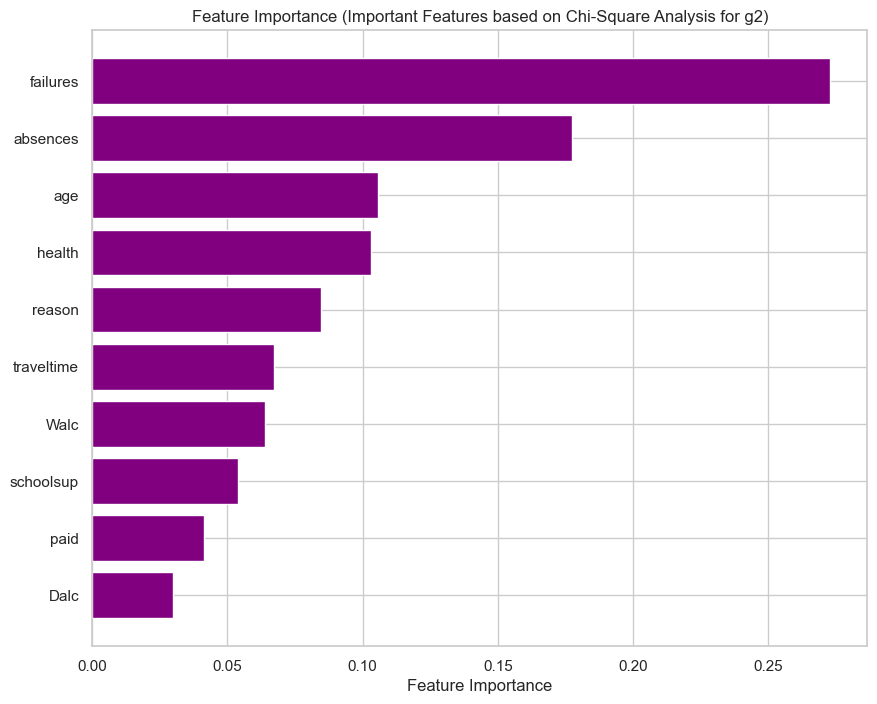

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt

# Extracting top 10 features based on feature importance
top_features = ['absences', 'failures', 'Dalc', 'Walc', 'reason',
                'age','schoolsup', 'traveltime', 'paid', 'health']

# Preparing input features (X) and target variable (y)
X_top = df[top_features]
y = df['G2']  # Continuous target variable

# Oversampling to handle imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_top, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Initializing and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual G2')
plt.ylabel('Predicted G2')
plt.title('Actual vs Predicted G2 (Top 10 Features)')
plt.show()

# Visualizing Feature Importances (Top 10)
feature_importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh([top_features[i] for i in sorted_indices], feature_importances[sorted_indices], color='purple')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Important Features based on Chi-Square Analysis for g2)')
plt.gca().invert_yaxis()
plt.show()

# Treating target variable (g3) as a categorical variable and modelling a classification model

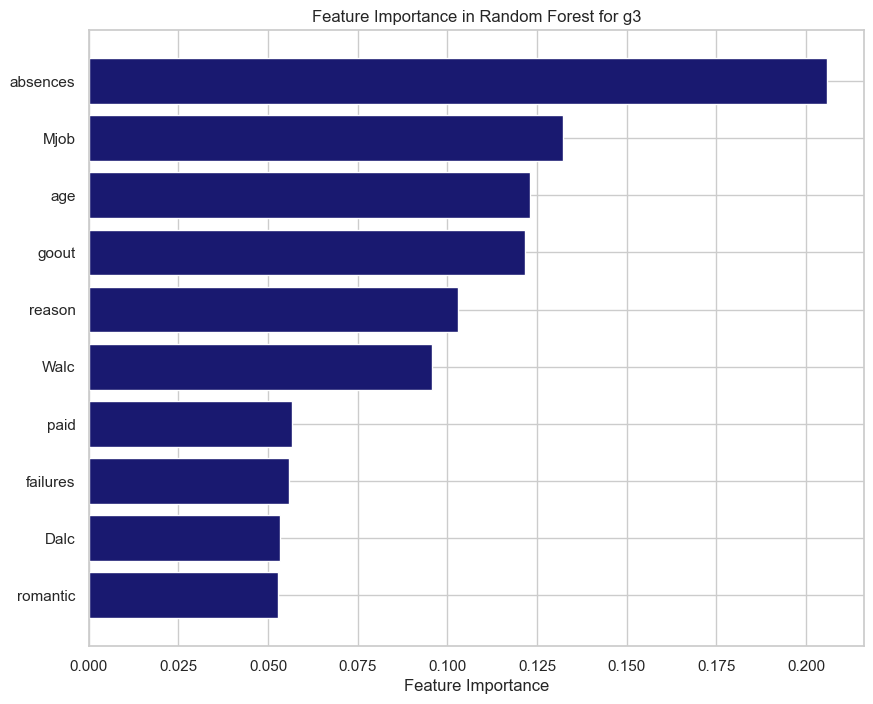

Model Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       1.00      1.00      1.00        16
           2       0.85      1.00      0.92        17
           3       0.81      1.00      0.89        17
           4       0.94      1.00      0.97        17
           5       0.75      0.71      0.73        17
           6       0.68      0.76      0.72        17
           7       0.40      0.12      0.18        17
           8       0.36      0.31      0.33        16
           9       0.67      0.71      0.69        17
          10       0.73      0.65      0.69        17
          11       0.67      0.82      0.74        17
          12       0.75      0.71      0.73        17
          13       0.85      1.00      0.92        17
          14       0.94      1.00      0.97        17
          15       0.94      0.88      0.91        17
          16       0.94      1.00  

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Selecteing top 10 features based on Chi-Square analysis
top_features = ['absences', 'failures', 'Dalc', 'Walc', 'reason',
                'age', 'romantic', 'paid', 'Mjob', 'goout']

# Preparing input features (X) and target variable (y)
X_top = df[top_features]
y = df['G3']

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in X_top.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_top[col] = le.fit_transform(X_top[col])
    label_encoders[col] = le

# Handling class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_top, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualizing feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh([top_features[i] for i in sorted_indices], feature_importances[sorted_indices], color='midnightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest for g3')
plt.gca().invert_yaxis()
plt.show()

# Displaying evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Treating target variable (g3) as a continuous variable and modelling a regression model

Mean Absolute Error (MAE): 1.09
Mean Squared Error (MSE): 4.64
R² Score: 0.83


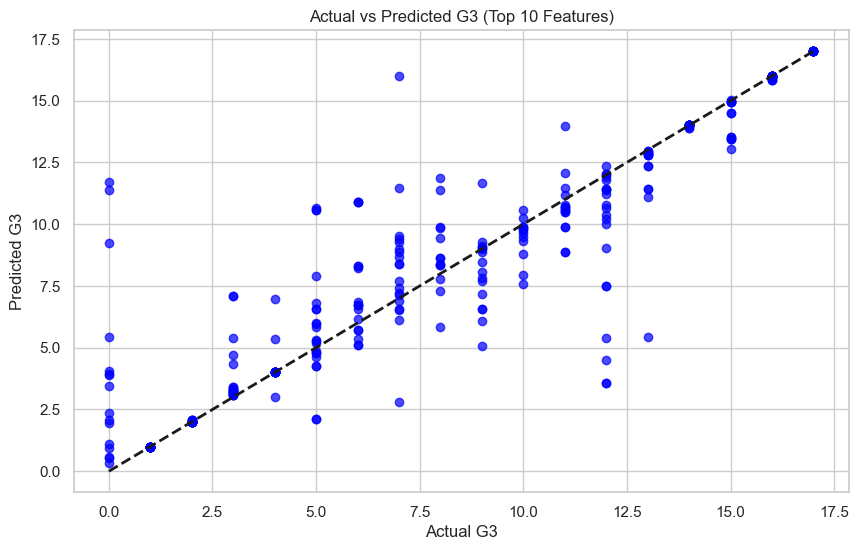

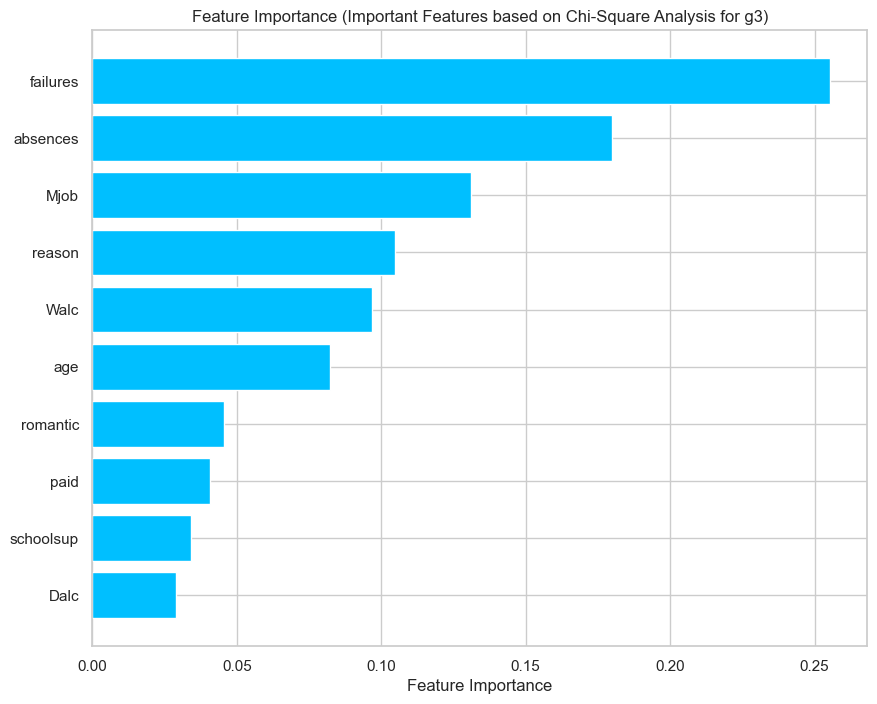

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt

# Extracting top 10 features based on feature importance
top_features = ['absences', 'failures', 'Dalc', 'Walc', 'reason',
                'age', 'schoolsup','romantic', 'paid' , 'Mjob']

# Preparing input features (X) and target variable (y)
X_top = df[top_features]
y = df['G3']  # Continuous target variable

# Oversampling to handle imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_top, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Initializing and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3 (Top 10 Features)')
plt.show()

# Visualizing Feature Importances (Top 10)
feature_importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh([top_features[i] for i in sorted_indices], feature_importances[sorted_indices], color='deepskyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Important Features based on Chi-Square Analysis for g3)')
plt.gca().invert_yaxis()
plt.show()